## Import libraries

In [234]:
#!pip install librosa

In [235]:
from IPython.display import Audio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale


from sklearn.impute import KNNImputer
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import IPython.display as ipd
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

import os

In [236]:
dirname = '../input/hindi-speech-classification/dataset/train'        
d = pd.read_csv("../input/hindi-speech-classification/dataset/train.csv")
d['file_id'] = d['file_id'].apply(lambda x: os.path.join(dirname,x))

In [237]:
d.head(10)

,file_id,gender
0,../input/hindi-speech-classification/dataset/t...,male
1,../input/hindi-speech-classification/dataset/t...,male
2,../input/hindi-speech-classification/dataset/t...,male
3,../input/hindi-speech-classification/dataset/t...,female
4,../input/hindi-speech-classification/dataset/t...,male
5,../input/hindi-speech-classification/dataset/t...,male
6,../input/hindi-speech-classification/dataset/t...,male
7,../input/hindi-speech-classification/dataset/t...,female
8,../input/hindi-speech-classification/dataset/t...,male
9,../input/hindi-speech-classification/dataset/t...,female


In [238]:
d.info

<bound method DataFrame.info of                                                 file_id  gender
0     ../input/hindi-speech-classification/dataset/t...    male
1     ../input/hindi-speech-classification/dataset/t...    male
2     ../input/hindi-speech-classification/dataset/t...    male
3     ../input/hindi-speech-classification/dataset/t...  female
4     ../input/hindi-speech-classification/dataset/t...    male
...                                                 ...     ...
1993  ../input/hindi-speech-classification/dataset/t...    male
1994  ../input/hindi-speech-classification/dataset/t...    male
1995  ../input/hindi-speech-classification/dataset/t...    male
1996  ../input/hindi-speech-classification/dataset/t...    male
1997  ../input/hindi-speech-classification/dataset/t...    male

[1998 rows x 2 columns]>

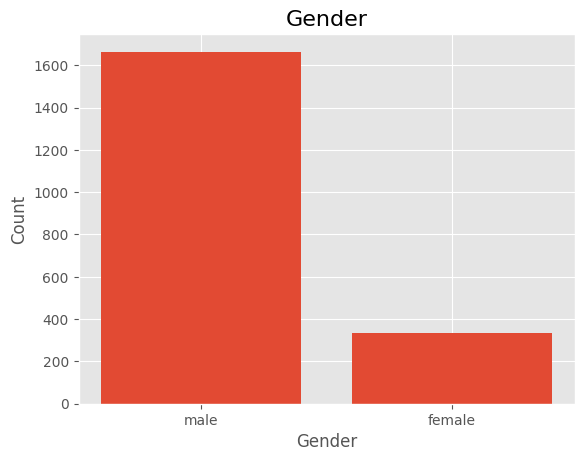

In [239]:
counts = d['gender'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Gender', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)
plt.show()

### Male count is much higher than female count. Hence the data is imbalanced.

In [240]:

for dirname, _, filenames in os.walk('/kaggle/input/hindi-speech-classification/dataset/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_26236348.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_25982670.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_25982602.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_24758462.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_25935932.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_25998803.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_26044000.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_26326512.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_25242412.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_24026514.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_voice_hi_23839871.mp3
/kaggle/input/hindi-speech-classification/dataset/train/common_vo

In [241]:
def create_Zero_crossing_rate(data, sr, i):
    
    zero_crossings = librosa.zero_crossings(data)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(10, 3))
    plt.title('Zero Crossing Rate of audio {} '.format(i), size=15)
    zcrs = librosa.feature.zero_crossing_rate(data)
    plt.plot(zcrs[0])
    plt.show()   

In [242]:
def create_waveplot(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {}'.format(i), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

### Two samples for Male voices

Sum of zero crossing  6721


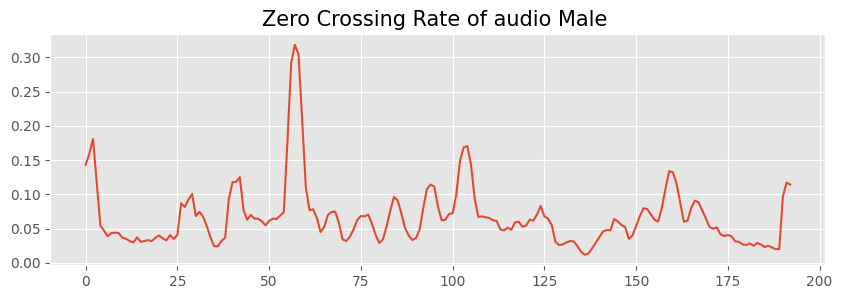

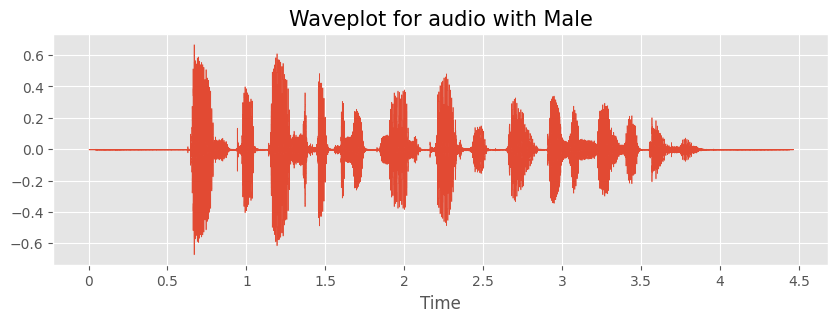

In [243]:
MALE_1 = d[(d['gender']=='male') ]
Male1 = MALE_1.sample()
x= Male1.iloc[0].file_id+".mp3"
info= "Male"
data, sampling_rate = librosa.load(x)
create_Zero_crossing_rate(data, sampling_rate, info)
create_waveplot(data, sampling_rate, info)
Audio(x)

Sum of zero crossing  15199


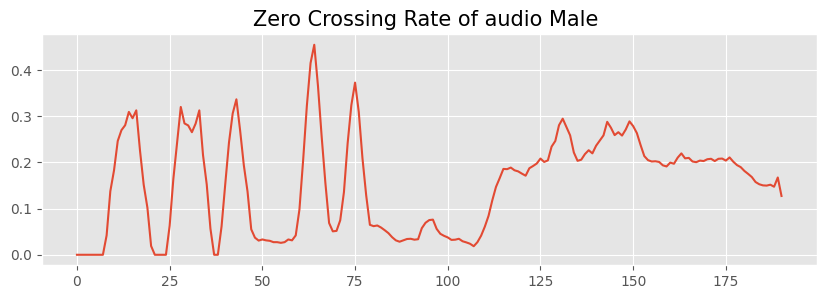

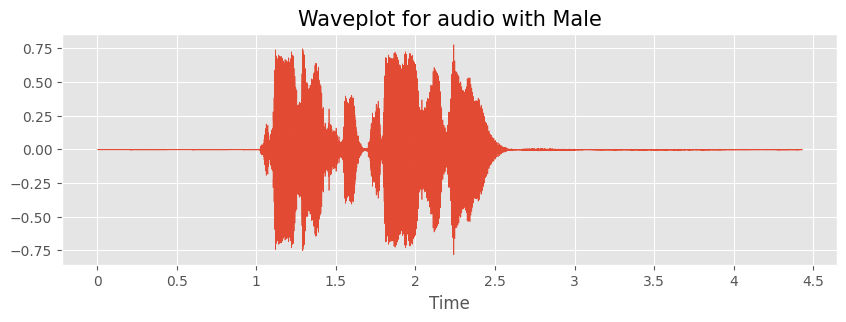

In [244]:
MALE_2 = d[(d['gender']=='male') ]
Male2 = MALE_2.sample()
x= Male2.iloc[0].file_id+".mp3"
info= "Male"
data, sampling_rate = librosa.load(x)
create_Zero_crossing_rate(data, sampling_rate, info)
create_waveplot(data, sampling_rate, info)
Audio(x)

### Two samples for Female voices

Sum of zero crossing  8017


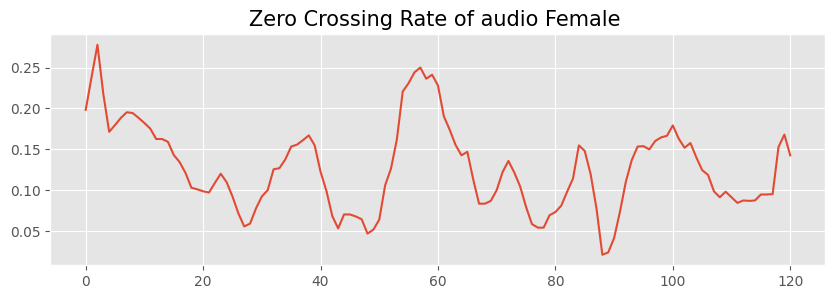

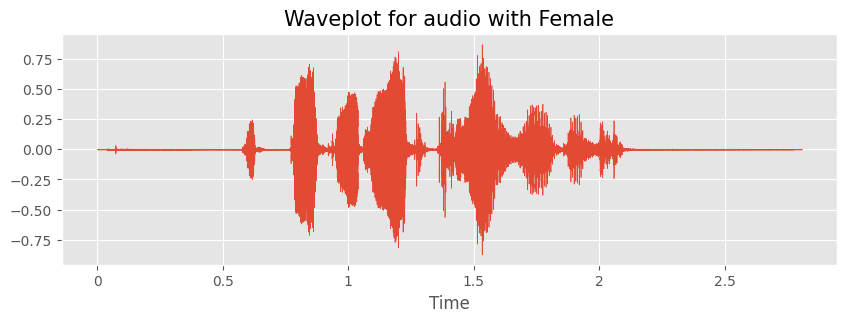

In [245]:
FEMALE_1 = d[(d['gender']=='female') ]
Female1 = FEMALE_1.sample()
x= Female1.iloc[0].file_id+".mp3"
info= "Female"
data, sampling_rate = librosa.load(x)
create_Zero_crossing_rate(data, sampling_rate, info)
create_waveplot(data, sampling_rate, info)
Audio(x)

Sum of zero crossing  16991


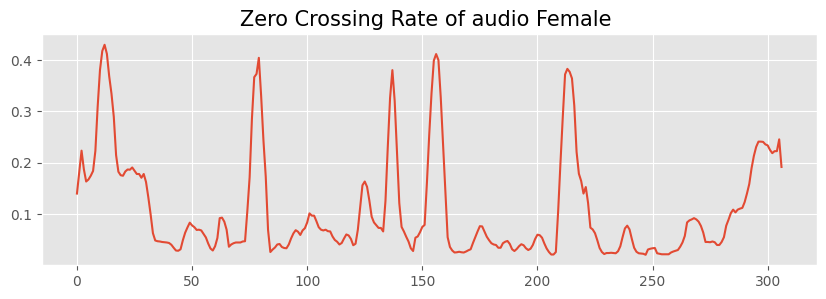

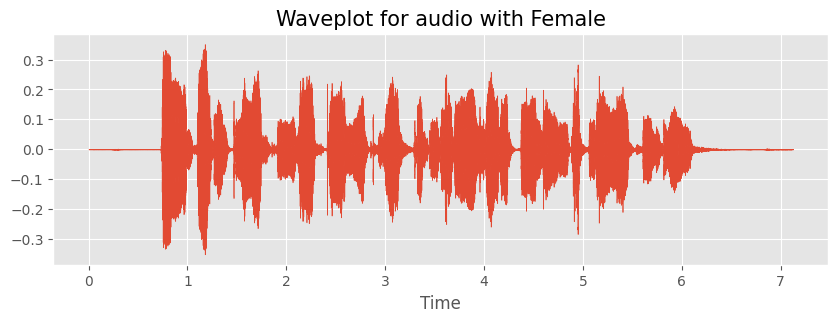

In [246]:
FEMALE_1 = d[(d['gender']=='female') ]
Female1 = FEMALE_1.sample()
x= Female1.iloc[0].file_id+".mp3"
info= "Female"
data, sampling_rate = librosa.load(x)
create_Zero_crossing_rate(data, sampling_rate, info)
create_waveplot(data, sampling_rate, info)
Audio(x)

## 3. Extract zero crossing rate features for all audios.

In [247]:
def all_create_zero_cross_rating_features(x):
    zcrs = []
    try:
        data , sr = librosa.load(x)
        zcrs = librosa.feature.zero_crossing_rate(data)[0]
    except:
        print('Error reading audio')
    return zcrs

In [248]:

All_audios = pd.DataFrame((d['file_id']+'.mp3').apply(lambda a: all_create_zero_cross_rating_features(a)).tolist())

In [249]:
All_audios.head(10)

,0,1,2,3,4,5,6,7,8,9,...,429,430,431,432,433,434,435,436,437,438
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028320,0.065918,0.065918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013672,0.101074,0.151855,0.151855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.125977,0.160645,0.199219,0.172363,0.162109,0.171875,0.182617,0.188477,0.190918,0.195312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.297363,0.456055,0.615234,0.633301,0.626953,0.621582,0.611328,0.571289,0.531738,0.506348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.107422,0.133301,0.162598,0.113281,0.098633,0.095215,0.080566,0.068359,0.072266,0.077148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.104980,0.135742,0.175781,0.146484,0.150391,0.156738,0.139648,0.125488,0.119141,0.118652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.057617,0.069336,0.089355,0.094238,0.085449,0.098145,0.135742,0.146973,0.141113,0.230469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.148926,0.196289,0.232422,0.170898,0.144043,0.138672,0.138672,0.152832,0.166016,0.171387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.274902,0.387207,0.504395,0.485840,0.399414,0.357910,0.311523,0.296875,0.298340,0.287598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
print(All_audios.shape, d.shape)

(1998, 439) (1998, 2)


In [251]:
All_audios.isnull().sum().sum()

518865

In [252]:
#All_audios.to_csv("All_audios.csv",index=False) #saving ZCR all audio dataframe as csv for future purposes

In [253]:
#All_audios= pd.read_csv("/kaggle/input/Allaudios/All_audios.csv") #reading ZCR all audio dataframe as csv if required

In [254]:
All_audios_impute = All_audios.copy()

In [255]:
All_audios_impute = All_audios_impute.fillna(0)

In [256]:
All_audios_impute.isnull().sum().sum()

0

## Demonstrating Correlation between different zero cross rating features after imputing null values with 0's

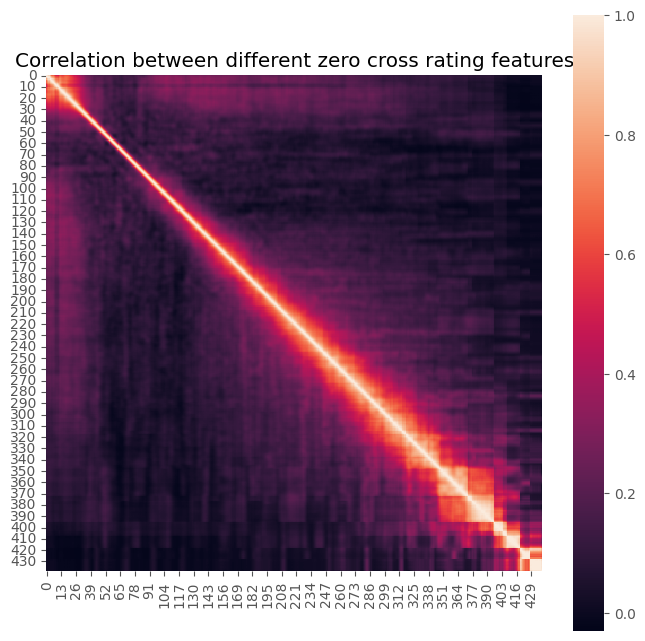

In [257]:
plt.figure(figsize=(8,8))
sns.heatmap(All_audios_impute.corr(), vmax=1, square=True)

plt.title('Correlation between different zero cross rating features')
plt.show()

##  b. KNN imputation 


### Define imputer

In [258]:
from sklearn.impute import KNNImputer

In [259]:
imputer = KNNImputer() #using default parameters 

### Fit on the dataset

In [260]:
All_audios_impute_KNN = imputer.fit_transform(All_audios)

In [261]:
All_audios_impute_KNN= pd.DataFrame(All_audios_impute_KNN)

In [262]:
All_audios_impute_KNN.isnull().sum().sum()

0

## 5. Apply following:
## a. PCA on zero impute and generate the clusters using KMeans.


####  **Create and fit Principal Components**

In [263]:
pca = PCA()
All_audios_impute_pca = pca.fit_transform(All_audios_impute)

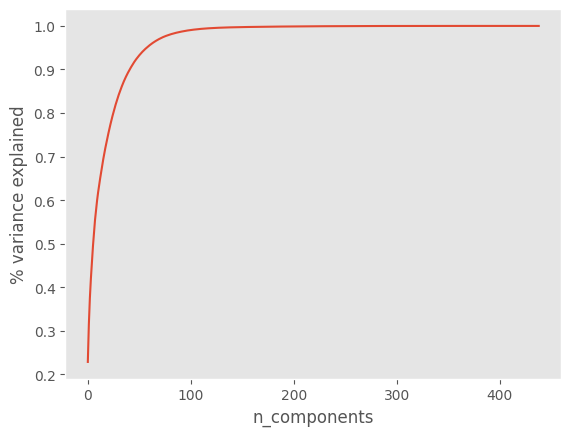

In [264]:

pca = PCA(n_components = All_audios_impute.shape[1])
pca_data = pca.fit_transform(All_audios_impute)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [265]:
cumm_var_explained

array([0.22857297, 0.31483076, 0.37556245, 0.42079281, 0.45934768,
       0.4946403 , 0.5258511 , 0.55478668, 0.57803085, 0.59953377,
       0.61805578, 0.63454949, 0.650307  , 0.66535006, 0.67999508,
       0.69410789, 0.70712902, 0.7195718 , 0.73116454, 0.74247872,
       0.75358133, 0.76436333, 0.77438471, 0.78427016, 0.7934978 ,
       0.80230065, 0.81101291, 0.81928498, 0.82704306, 0.83467576,
       0.84173897, 0.84844815, 0.85495142, 0.86112864, 0.86708112,
       0.87277626, 0.87811505, 0.88322431, 0.8880744 , 0.89266345,
       0.8970183 , 0.90130634, 0.90540526, 0.90937475, 0.91320782,
       0.91688048, 0.92034755, 0.92363289, 0.92672588, 0.92969354,
       0.93262502, 0.93540111, 0.93803959, 0.94058274, 0.94298981,
       0.94534354, 0.94751555, 0.94962366, 0.95170081, 0.95370598,
       0.95561119, 0.95745965, 0.95925219, 0.96089521, 0.96248547,
       0.96403764, 0.96551344, 0.96693369, 0.9683128 , 0.96958516,
       0.97082461, 0.97202614, 0.97318218, 0.97426835, 0.97529

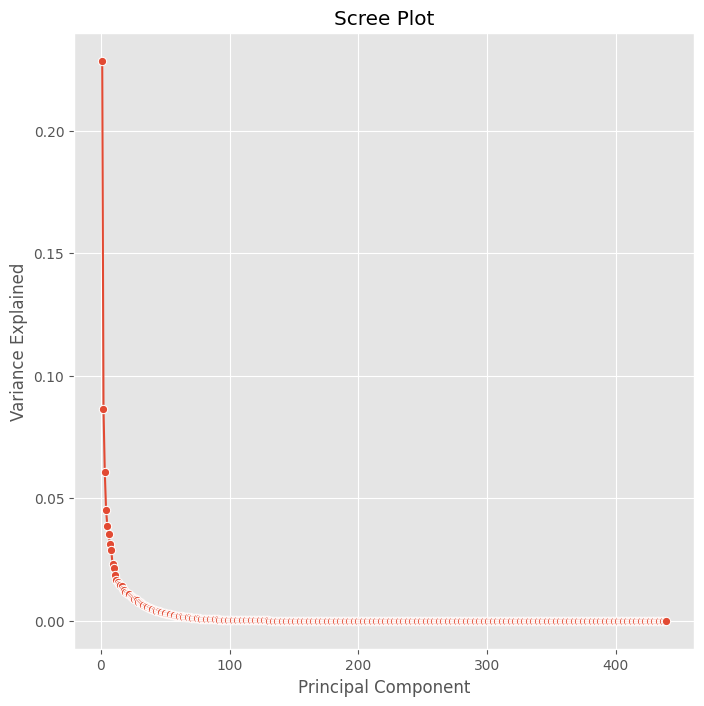

In [266]:
plt.figure(figsize=(8,8))
sns.lineplot(x=np.arange(pca.n_components_) + 1, y=pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


#### Convert to dataframe

In [267]:
All_audios_impute_pca = pd.DataFrame(All_audios_impute_pca, columns=['PCA_'+str(i) for i in range(len(All_audios_impute.columns))])

In [268]:
All_audios_impute_pca.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_429,PCA_430,PCA_431,PCA_432,PCA_433,PCA_434,PCA_435,PCA_436,PCA_437,PCA_438
0,-0.704114,-0.059409,0.095879,-0.157640,0.094617,0.103228,0.060811,-0.076168,-0.040649,0.008964,...,-2.665813e-17,6.351590e-17,1.127177e-16,2.622555e-17,-1.079638e-16,-8.311921e-17,5.981888e-17,-1.199456e-16,-1.113633e-16,-5.047424e-17
1,-0.396746,-0.181811,0.210582,0.060024,0.164239,0.084940,0.189669,0.090277,-0.116758,0.036313,...,-1.520531e-16,1.588270e-16,-4.823846e-17,-8.376571e-17,-1.673301e-16,9.700596e-17,-1.395122e-16,1.236100e-16,-3.590684e-17,1.127830e-16
2,1.256845,-1.171288,-0.008081,-0.789416,0.286978,0.938868,0.987544,0.148246,-0.362361,-0.157250,...,8.864013e-18,-4.974514e-18,-2.466357e-17,1.509321e-17,-5.741979e-18,-4.881137e-18,-7.643355e-18,1.621294e-17,1.090069e-17,3.517417e-18
3,-0.246978,0.297179,-0.266339,0.114676,-0.095234,0.044976,0.223125,-0.101452,0.046256,-0.172011,...,5.396123e-17,1.809427e-16,-1.813570e-16,-2.302563e-16,-7.710030e-17,-9.841342e-17,7.156393e-17,1.103423e-16,8.928775e-17,-2.992671e-17
4,2.217318,0.717618,1.715476,-0.059249,-0.900722,0.229799,-0.703311,-0.258984,0.122750,-0.146008,...,-3.404714e-17,4.366106e-17,3.318959e-17,1.110916e-16,-2.288897e-16,1.717841e-17,-2.528995e-17,-2.938070e-17,-1.554817e-16,1.897049e-16


## Correlation between PCA Components

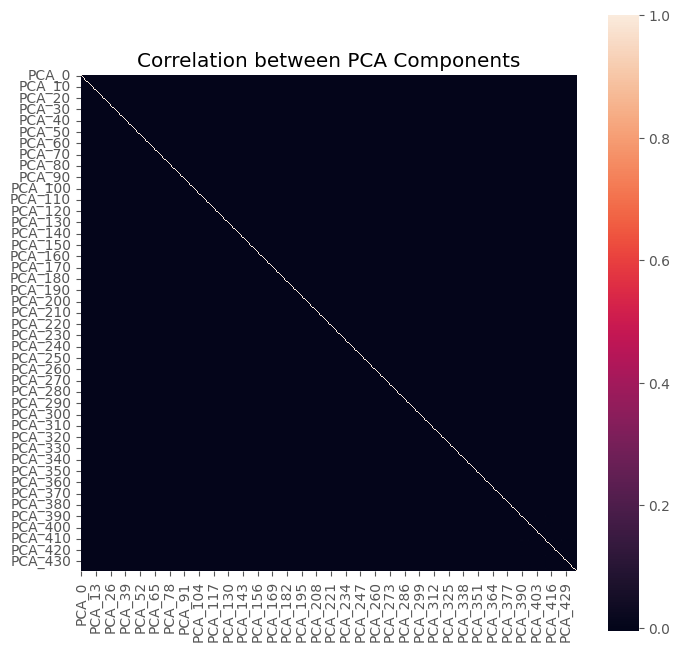

In [269]:
plt.figure(figsize=(8,8))
sns.heatmap(All_audios_impute_pca.corr(), vmax=1, square=True)

plt.title('Correlation between PCA Components')
plt.show()

### KMeans Clustering

In [270]:
optimal_value = []
for i in range(1, 11):
    kmeans_cluster = KMeans(n_clusters = i, init = 'k-means++', random_state = 32)
    kmeans_cluster.fit(All_audios_impute_pca.iloc[:, :3])
    optimal_value.append(kmeans_cluster.inertia_)

### The Elbow Method

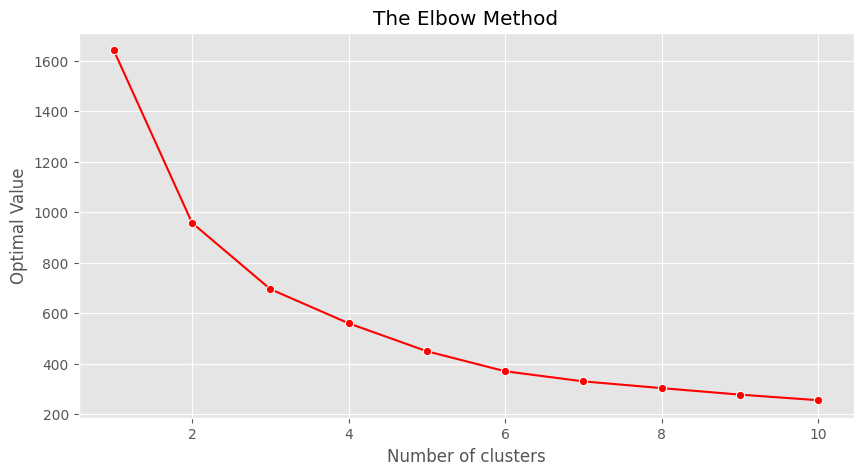

In [271]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=optimal_value, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Optimal Value')
plt.show()


In [272]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
final_kmeans = kmeans.fit_predict(All_audios_impute_pca.iloc[:, :3])

In [273]:
trace1 = go.Scatter3d(
    x= All_audios_impute_pca['PCA_0'],
    y= All_audios_impute_pca['PCA_1'],
    z= All_audios_impute_pca['PCA_2'],
    mode='markers',
     marker=dict(
        color = final_kmeans, 
        size= 10,
        line=dict(
            color= final_kmeans,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three PCA Components',
    scene = dict(
            xaxis = dict(title  = 'PCA 0'),
            yaxis = dict(title  = 'PCA 1'),
            zaxis = dict(title  = 'PCA 2')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

## b. PCA on KNN imputation with KMeans, Agglomerative, DBSCAN, and mean shift.


In [274]:
pca = PCA()
All_audios_impute_pcaKNN = pca.fit_transform(All_audios_impute_KNN)

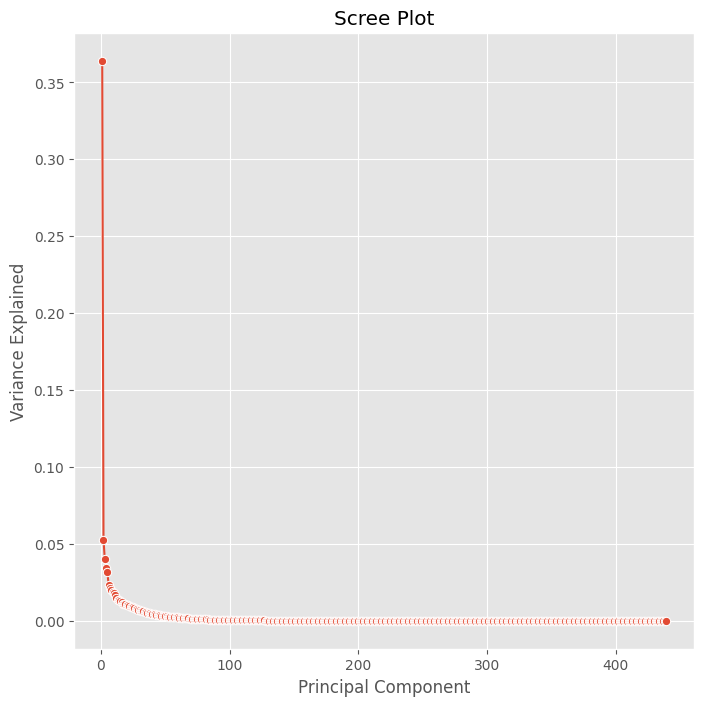

In [275]:
plt.figure(figsize=(8,8))
sns.lineplot(x=np.arange(pca.n_components_) + 1, y=pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


#### Convert to dataframe

In [276]:
All_audios_impute_pcaKNN = pd.DataFrame(All_audios_impute_pcaKNN, columns=['PCA_'+str(i) for i in range(len(All_audios_impute_KNN.columns))])
All_audios_impute_pcaKNN.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_429,PCA_430,PCA_431,PCA_432,PCA_433,PCA_434,PCA_435,PCA_436,PCA_437,PCA_438
0,-0.836062,-0.030486,-0.054834,0.130806,0.036355,0.075835,0.116816,-0.141969,0.165202,0.141784,...,-3.876103e-17,-9.301440e-17,5.005760e-17,-6.281990e-17,9.945274e-17,4.676467e-17,-2.566406e-17,6.357291e-17,-2.985979e-17,-1.714968e-16
1,-0.764971,-0.004839,0.025675,0.146360,0.124876,-0.033616,0.062736,0.013622,0.093098,0.060587,...,-7.942010e-17,-3.358152e-17,-6.004794e-17,1.925147e-16,-4.422375e-17,8.573360e-17,-6.829192e-17,1.922748e-16,-1.266516e-17,1.860637e-16
2,0.615048,0.063334,-0.349209,1.080890,-0.060471,-0.175565,0.844022,0.278007,0.670626,-0.366243,...,1.668091e-17,5.509829e-17,5.403512e-18,-3.462976e-17,-4.699126e-17,-1.037475e-16,-1.282436e-17,-2.576899e-17,-9.296422e-18,-5.447860e-18
3,0.114841,-0.038828,-0.069942,0.201489,-0.237340,0.003719,0.149520,-0.205042,-0.050200,0.028756,...,5.602573e-17,1.541137e-16,-1.357398e-16,8.331813e-17,-3.894920e-17,-1.123151e-16,3.354379e-17,-1.777804e-17,-4.282948e-17,-6.601571e-17
4,3.440896,-0.158665,-1.076149,0.193675,0.044395,0.850990,-0.261682,0.013872,-0.909064,0.565825,...,-1.893595e-17,2.597100e-17,-6.073347e-17,7.989238e-18,-1.293929e-17,-6.339611e-18,-9.782595e-17,3.487899e-17,-6.512922e-17,3.172198e-17


## Correlation between PCA Components

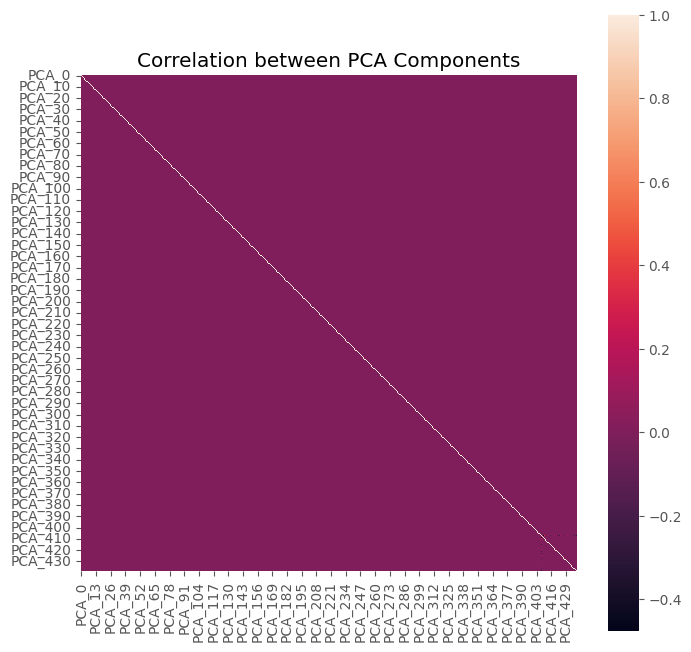

In [277]:
plt.figure(figsize=(8,8))
sns.heatmap(All_audios_impute_pcaKNN.corr(), vmax=1, square=True)

plt.title('Correlation between PCA Components')
plt.show()

## K-means

In [278]:
optimal_value = []
for i in range(1, 11):
    kmeans_cluster = KMeans(n_clusters = i, init = 'k-means++', random_state = 32)
    kmeans_cluster.fit(All_audios_impute_pcaKNN.iloc[:, :3])
    optimal_value.append(kmeans_cluster.inertia_)

### Elbow method

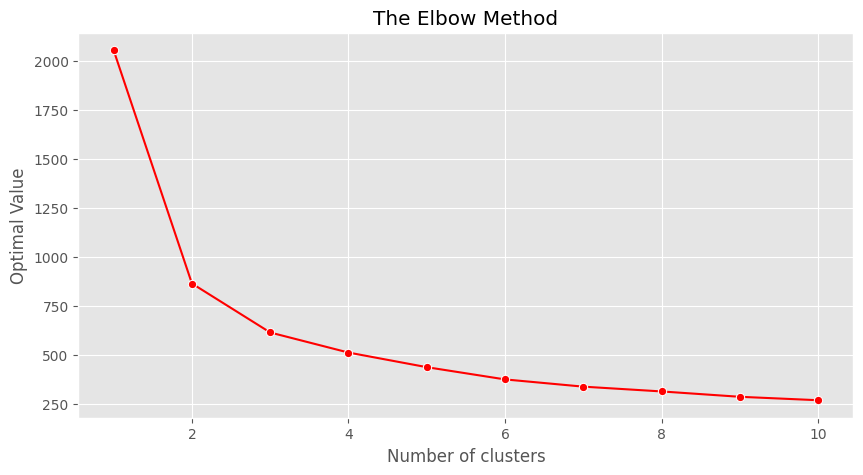

In [279]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=optimal_value, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Optimal Value')
plt.show()


In [280]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
final_kmeans = kmeans.fit_predict(All_audios_impute_pcaKNN.iloc[:, :3])

### The elbow for each component two clusters are highly seen and 3 or 4 can be used to create clusters, we selected 3 clusters 

In [281]:
trace1 = go.Scatter3d(
    x= All_audios_impute_pcaKNN['PCA_0'],
    y= All_audios_impute_pcaKNN['PCA_1'],
    z= All_audios_impute_pcaKNN['PCA_2'],
    mode='markers',
     marker=dict(
        color = final_kmeans, 
        size= 10,
        line=dict(
            color= final_kmeans,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three PCA Components',
    scene = dict(
            xaxis = dict(title  = 'PCA 0'),
            yaxis = dict(title  = 'PCA 1'),
            zaxis = dict(title  = 'PCA 2')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

### Agglomerative

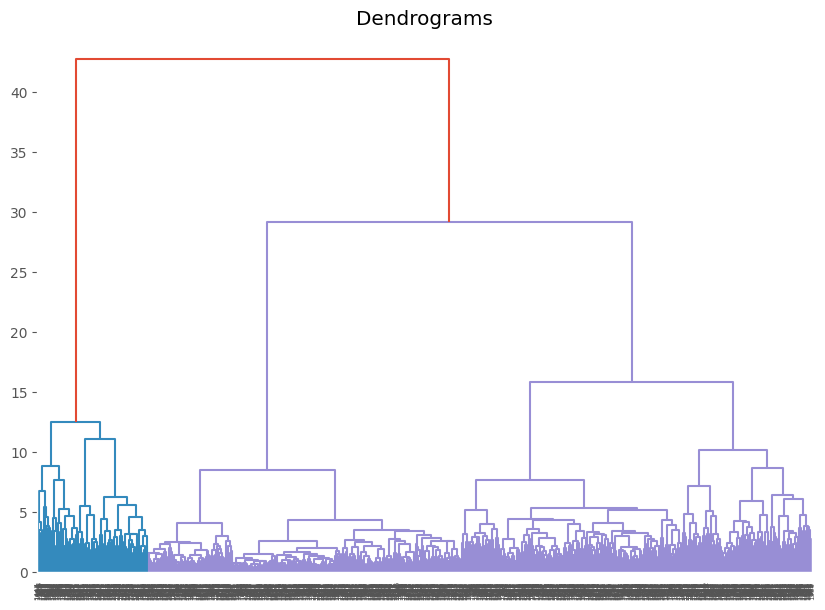

In [282]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(All_audios_impute_pcaKNN, method='ward'))

## Dendrogram for Agglomerative Clustering

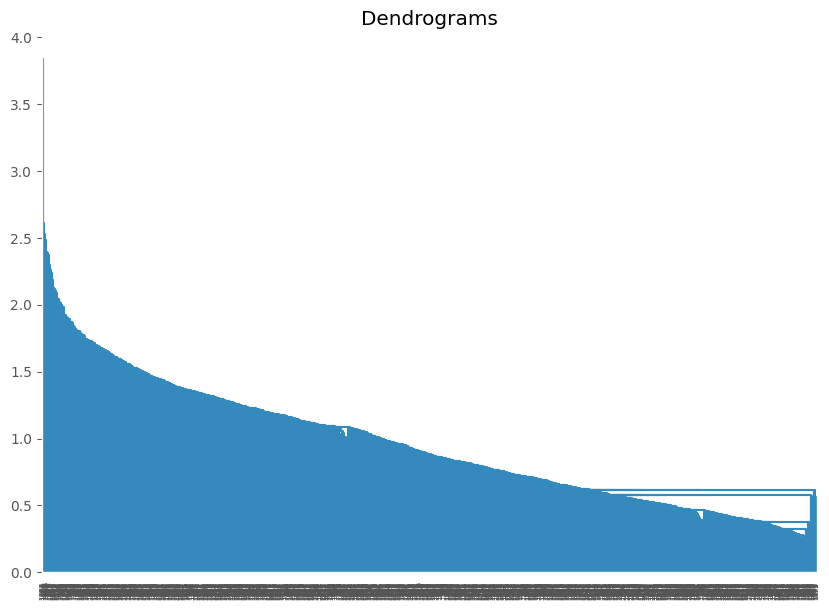

In [283]:
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(All_audios_impute_pcaKNN, method='single'))

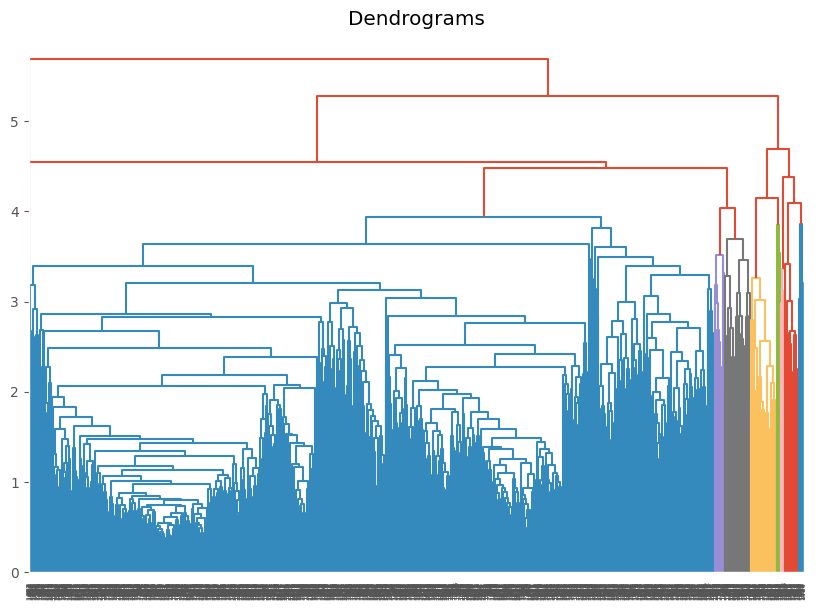

In [284]:
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(All_audios_impute_pcaKNN, method='complete'))

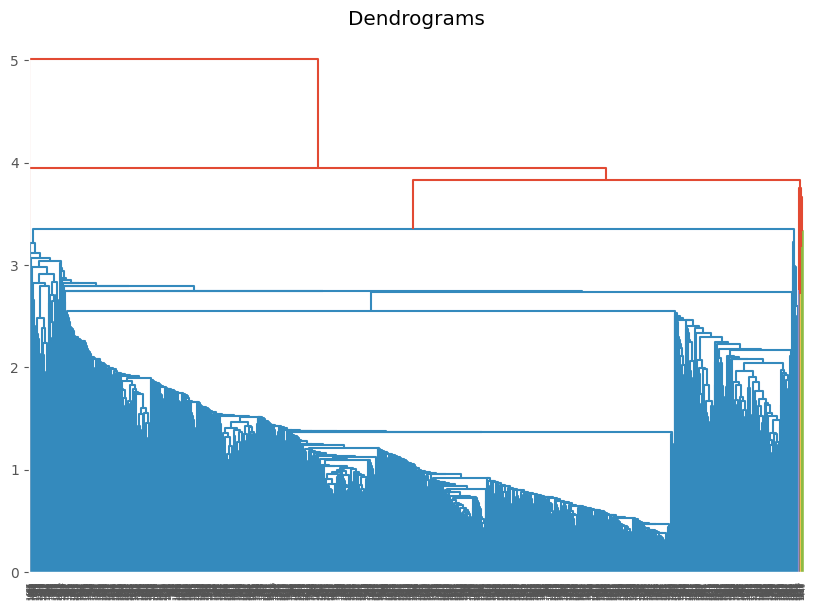

In [285]:
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(All_audios_impute_pcaKNN, method='average'))

## Best cluster number = 3 in ward

## Agglomerative clustering

In [286]:

from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
yhat = model.fit(All_audios_impute_pcaKNN)
ag_l= model.labels_
clusters = unique(yhat)
final_agg = yhat.fit_predict(All_audios_impute_pcaKNN.iloc[:, :3])

In [287]:

trace1 = go.Scatter3d(
    x= All_audios_impute_pcaKNN['PCA_0'],
    y= All_audios_impute_pcaKNN['PCA_1'],
    z= All_audios_impute_pcaKNN['PCA_2'],
    mode='markers',
     marker=dict(
        color = final_agg, 
        size= 10,
        line=dict(
            color= final_agg,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three PCA Components',
    scene = dict(
            xaxis = dict(title  = 'PCA 0'),
            yaxis = dict(title  = 'PCA 1'),
            zaxis = dict(title  = 'PCA 2')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

### DBSCAN


In [288]:
!pip install kneed

1.7048860149373137


<Figure size 500x500 with 0 Axes>

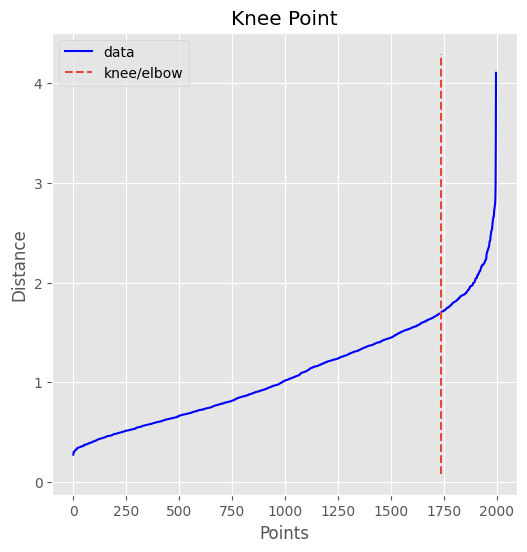

In [289]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(All_audios_impute_pcaKNN)
distances, indices = neighbors.kneighbors(All_audios_impute_pcaKNN)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

### Based on above we find eps value to be 1.81 

In [290]:
2*len(All_audios_impute_pcaKNN)

3996

In [291]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=1.8103981195633057)
# rule of thumb for min_samples: 2*len(df.columns)
final_db = model.fit_predict(All_audios_impute_pcaKNN)
clusters = unique(final_db)

In [292]:
clusters

array([-1,  0])

In [293]:

trace1 = go.Scatter3d(
    x= All_audios_impute_pcaKNN['PCA_0'],
    y= All_audios_impute_pcaKNN['PCA_1'],
    z= All_audios_impute_pcaKNN['PCA_2'],
    mode='markers',
     marker=dict(
        color = final_db, 
        size= 10,
        line=dict(
            color= final_db,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three PCA Components',
    scene = dict(
            xaxis = dict(title  = 'PCA 0'),
            yaxis = dict(title  = 'PCA 1'),
            zaxis = dict(title  = 'PCA 2')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

### Mean shift

In [294]:
from sklearn.cluster import  estimate_bandwidth
bandwidth = estimate_bandwidth(All_audios_impute_pcaKNN)

ms = MeanShift(bandwidth=bandwidth)
ms.fit(All_audios_impute_pcaKNN)
labels = ms.labels_
final_ms = ms.fit_predict(All_audios_impute_pcaKNN)


In [295]:
clusters = unique(final_ms)
clusters 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [296]:

trace1 = go.Scatter3d(
    x= All_audios_impute_pcaKNN['PCA_0'],
    y= All_audios_impute_pcaKNN['PCA_1'],
    z= All_audios_impute_pcaKNN['PCA_2'],
    mode='markers',
     marker=dict(
        color = final_ms, 
        size= 10,
        line=dict(
            color= final_ms,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three PCA Components',
    scene = dict(
            xaxis = dict(title  = 'PCA 0'),
            yaxis = dict(title  = 'PCA 1'),
            zaxis = dict(title  = 'PCA 2')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

## c. T-SNE (t-distributed Stochastic Neighbor Embedding) on zero impute with KMeans.

In [297]:
from sklearn.manifold import TSNE

In [298]:
tsne = TSNE(n_components=3, verbose=1, random_state=123)
model = tsne.fit_transform(All_audios_impute) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1998 samples in 0.004s...
[t-SNE] Computed neighbors for 1998 samples in 0.120s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1998
[t-SNE] Computed conditional probabilities for sample 1998 / 1998
[t-SNE] Mean sigma: 0.265701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.335831
[t-SNE] KL divergence after 1000 iterations: 1.309504


In [299]:
model.shape

(1998, 3)

In [300]:
model_tsne = pd.DataFrame({'C_0':model.T[0],'C_1':model.T[1],'C_2':model.T[2]})
                    

In [301]:
model_tsne.head()

,C_0,C_1,C_2
0,-9.667299,-3.582270,-10.111954
1,-0.098331,-4.395066,4.639500
2,17.711937,-21.175495,0.824542
3,-5.277761,16.257944,9.026366
4,19.371313,16.531628,2.912725


## KMeans Clusetring with one TSNE Component

In [302]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 132)
final_ts1 = kmeans.fit_predict(model_tsne.iloc[:,:1])

## KMeans Clusetring with three TSNE Component

In [303]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 132)
final_ts3 = kmeans.fit_predict(model_tsne.iloc[:,:3])

In [304]:

trace1 = go.Scatter3d(
    x= model_tsne['C_0'],
    y= model_tsne['C_1'],
    z= model_tsne['C_2'],
    mode='markers',
     marker=dict(
        color = final_ts3, 
        size= 10,
        line=dict(
            color= final_ts3,
            width= 12
        ),
        opacity=0.8
     )
)
data_plotly = [trace1]
layout = go.Layout(
    title= 'Clusters wrt three TSNE Components',
    scene = dict(
            xaxis = dict(title  = 'C 1'),
            yaxis = dict(title  = 'C 2'),
            zaxis = dict(title  = 'C 3')
        )
)
fig = go.Figure(data=data_plotly, layout=layout)
fig.show()

## 6. Apply silhouette score metric on the labels. Comment on the metric results. 


In [306]:
from sklearn.metrics import silhouette_score

score_kemans_s = silhouette_score(All_audios_impute_pcaKNN.iloc[:, :3], final_kmeans)
print('Silhouette Score: %.4f' % score_kemans_s)


Silhouette Score: 0.4265


In [307]:
score_AGclustering_s = silhouette_score(All_audios_impute_pcaKNN.iloc[:, :3], ag_l, metric='euclidean')
print('Silhouette Score: %.4f' % score_AGclustering_s)

Silhouette Score: 0.3601


In [308]:
score_dbsacn_s = silhouette_score(All_audios_impute_pcaKNN.iloc[:, :3], final_db, metric='euclidean')
print('Silhouette Score: %.4f' % score_dbsacn_s)

Silhouette Score: 0.4160


In [309]:
score_m_s = silhouette_score(All_audios_impute_pcaKNN.iloc[:, :3], final_ms, metric='euclidean')
print('Silhouette Score: %.4f' % score_m_s)

Silhouette Score: -0.4723


In [310]:
score_t_s = silhouette_score(All_audios_impute_pca.iloc[:, :3], final_ts1, metric='euclidean')
print('Silhouette Score: %.4f' % score_t_s)

Silhouette Score: 0.2680


In [311]:
score_t_s = silhouette_score(All_audios_impute_pca.iloc[:, :3], final_ts3, metric='euclidean')
print('Silhouette Score: %.4f' % score_t_s)

Silhouette Score: 0.2685
